**Ardunio gesture recognition** - Final project

environment setup

In [14]:
!apt-get -qq install xxd
!pip install tensorflow==2.0.0-rc1
!pip install pandas numpy matplotlib

Data files uploaded.

graph data below

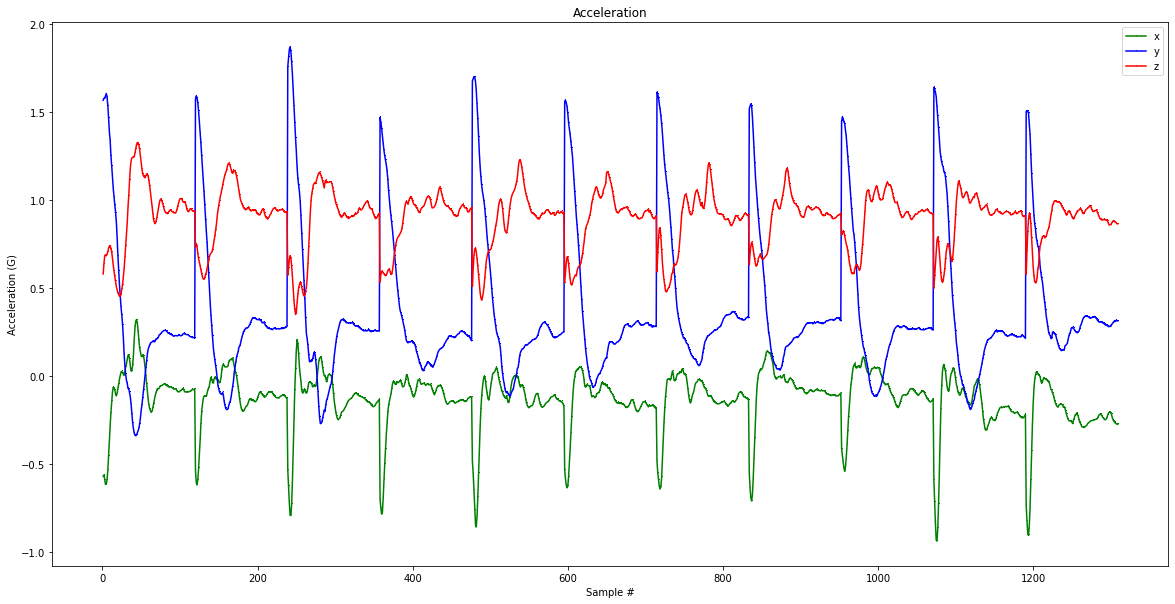

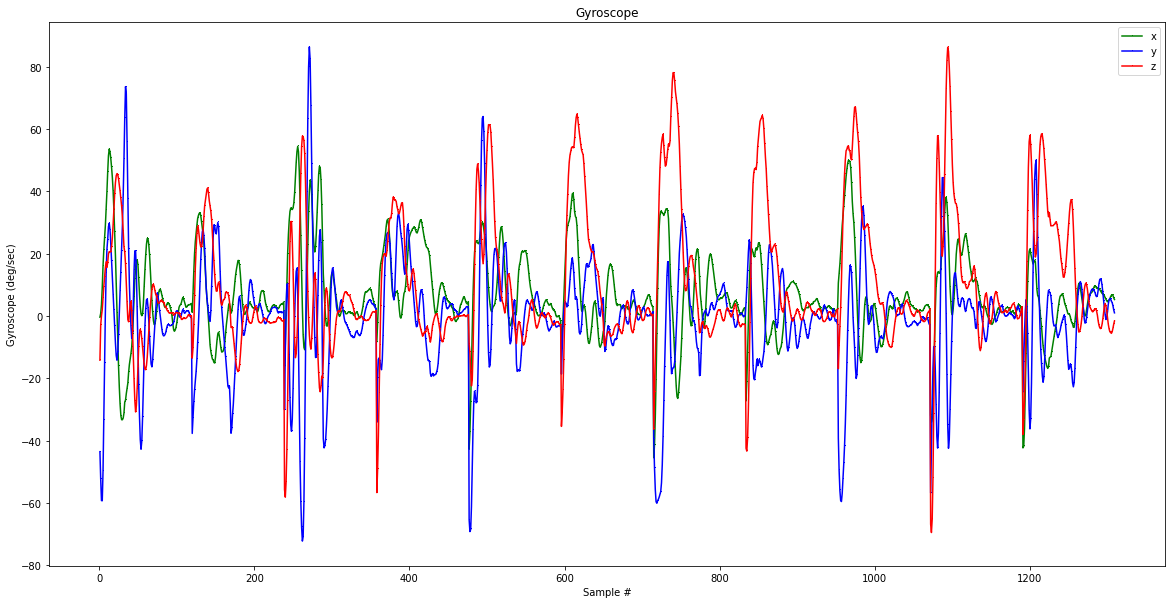

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = "punch.csv"
df = pd.read_csv("/content/" + filename)
index = range(1, len(df['aX']) + 1)
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

csv files are parsed and changed into a format that can be used to train the network. 

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

GESTURES = [
    "punch",
    "flex",
]

SAMPLES_PER_GESTURE = 119
NUM_GESTURES = len(GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/" + gesture + ".csv")
  
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tnumber of {gesture} recordings: {num_recordings}.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
     
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)

	number of punch recordings: 11.
	number of flex recordings: 20.


Input and output pairs randomly split into data sets: 20% testing, 60% training, 20% validation 

In [35]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)
inputs = inputs[randomize]
outputs = outputs[randomize]
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)
inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

build model and train it 

In [36]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) #relu is better for perfomance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax because only one gesture per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



Train on 18 samples, validate on 7 samples
Epoch 1/600
18/18 [==============================] - 1s 35ms/sample - loss: 0.3072 - mae: 0.4993 - val_loss: 0.2028 - val_mae: 0.3947
Epoch 2/600
18/18 [==============================] - 0s 4ms/sample - loss: 0.2678 - mae: 0.5064 - val_loss: 0.2152 - val_mae: 0.4527
Epoch 3/600
18/18 [==============================] - 0s 3ms/sample - loss: 0.2496 - mae: 0.4922 - val_loss: 0.2114 - val_mae: 0.4439
Epoch 4/600
18/18 [==============================] - 0s 3ms/sample - loss: 0.2504 - mae: 0.4823 - val_loss: 0.2143 - val_mae: 0.4512
Epoch 5/600
18/18 [==============================] - 0s 4ms/sample - loss: 0.2493 - mae: 0.4821 - val_loss: 0.2171 - val_mae: 0.4572
Epoch 6/600
18/18 [==============================] - 0s 4ms/sample - loss: 0.2460 - mae: 0.4896 - val_loss: 0.2125 - val_mae: 0.4482
Epoch 7/600
18/18 [==============================] - 0s 5ms/sample - loss: 0.2489 - mae: 0.4748 - val_loss: 0.2172 - val_mae: 0.4579
Epoch 8/600
18/18 [======

graph the loss 

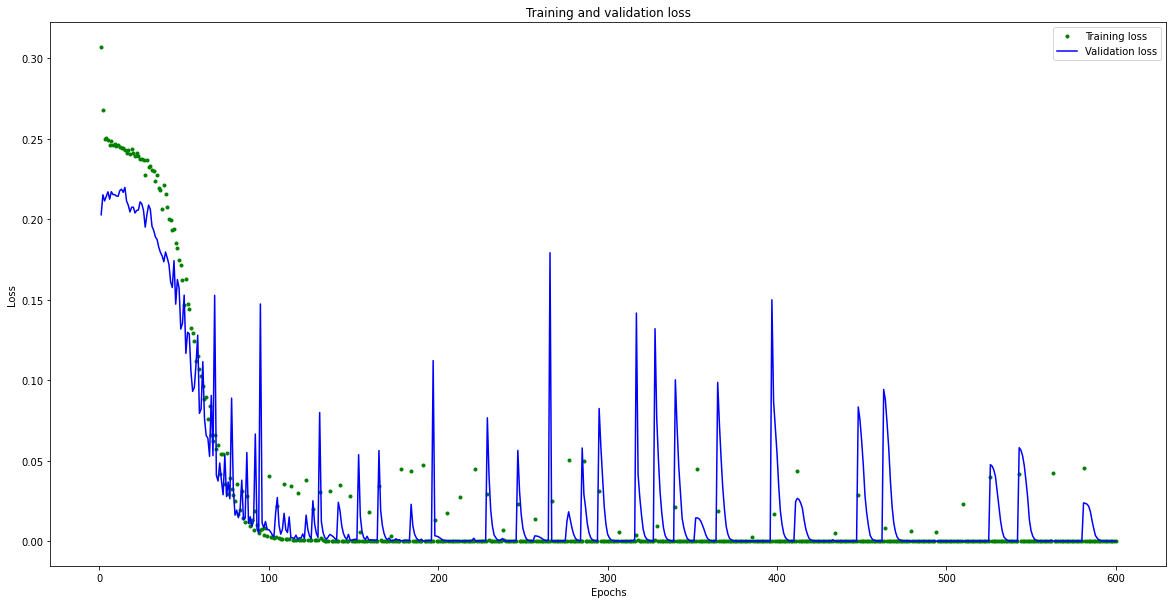

[20.0, 10.0]


In [37]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

graph mean absolute error

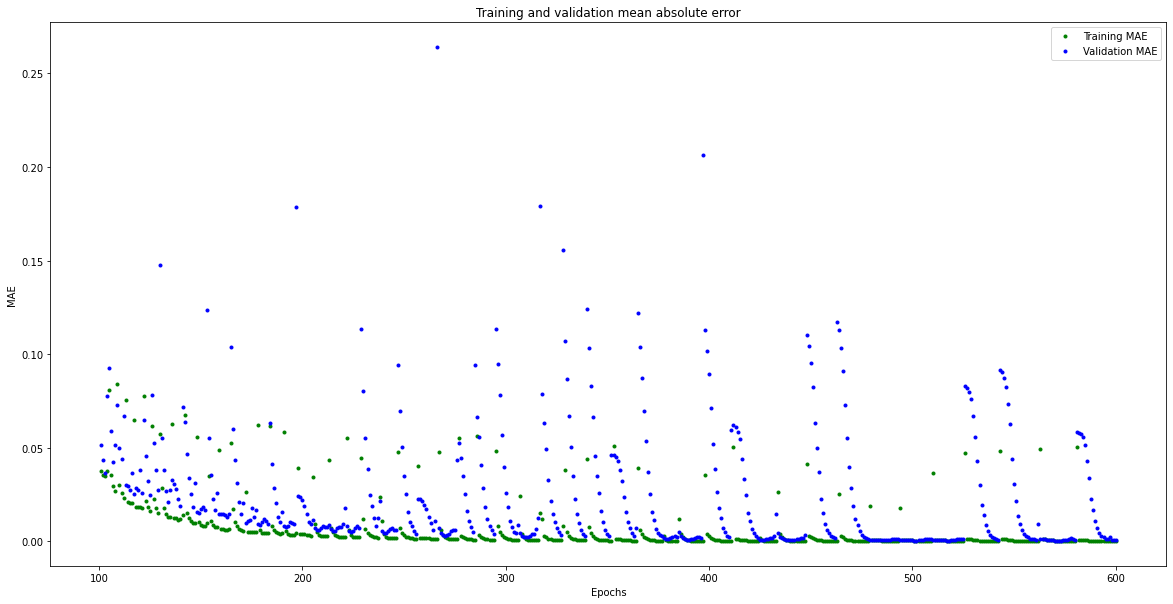

In [38]:
mae = history.history['mae']
SKIP = 100
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

test data into model and plot predictions 


predictions =
 [[1.    0.   ]
 [1.    0.   ]
 [0.209 0.791]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]
actual =
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if __name__ == '__main__':


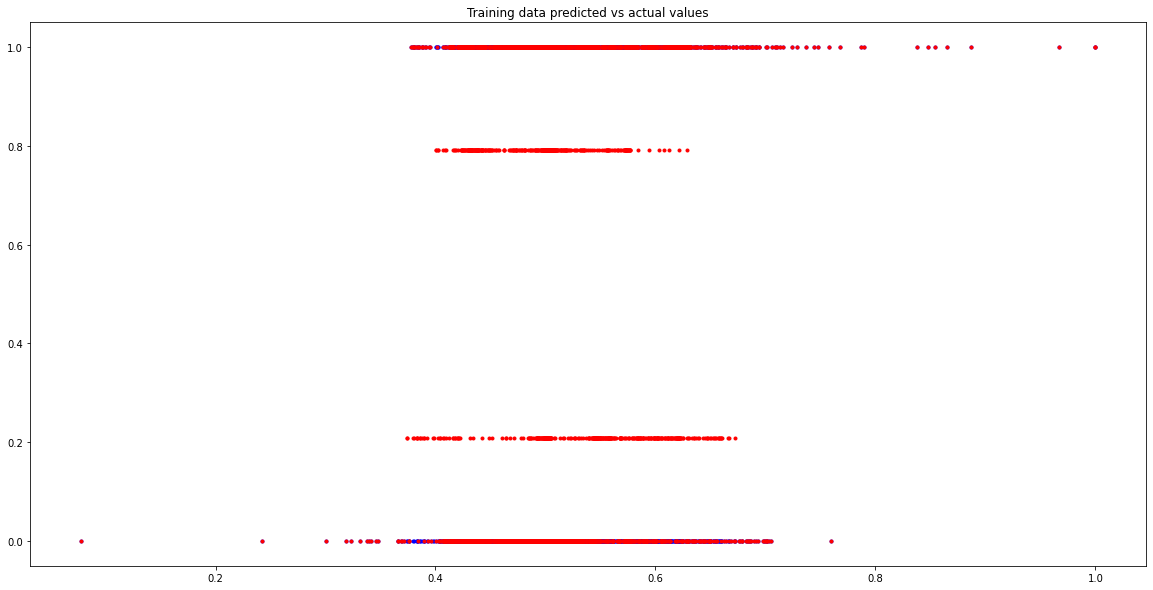

In [39]:
predictions = model.predict(inputs_test)

print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

trained model is then converted to tensor flow lite

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 147800 bytes


model encoded in ardunio header file

In [41]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")

In [42]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  35750     
_________________________________________________________________
dense_7 (Dense)              multiple                  765       
_________________________________________________________________
dense_8 (Dense)              multiple                  32        
Total params: 36,547
Trainable params: 36,547
Non-trainable params: 0
_________________________________________________________________
